In [2]:
import torch
file_path ='/data/jx4237data/GNNteamingEvaluator/TeamingEvaluator/data/yearly_snapshots_specter2_starting_from_year_1/G_2024.pt'

G = torch.load(file_path)

print(G)

HeteroData(
  paper={
    x_title_emb=[9399, 768],
    y_citations=[9399, 5],
    is_core=[9399],
    y_year=[9399],
    raw_ids=[9399],
    x=[9399, 768]
  },
  author={
    x=[44673, 768],
    raw_ids=[44673]
  },
  venue={
    x=[1886, 768],
    raw_ids=[1886]
  },
  (author, writes, paper)={ edge_index=[2, 94486] },
  (paper, written_by, author)={ edge_index=[2, 94486] },
  (paper, cites, paper)={ edge_index=[2, 22809] },
  (paper, cited_by, paper)={ edge_index=[2, 22809] },
  (paper, published_in, venue)={ edge_index=[2, 9399] },
  (venue, publishes, paper)={ edge_index=[2, 9399] }
)


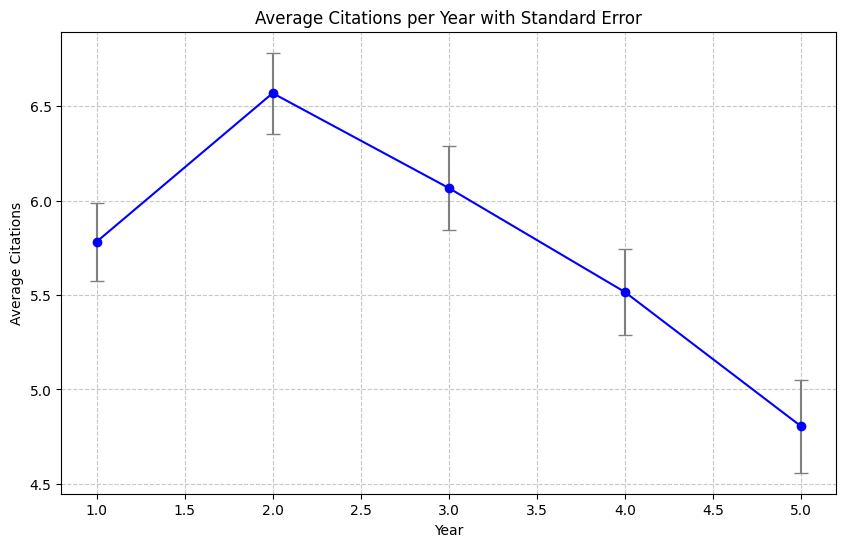

In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = '/data/jx4237data/GNNteamingEvaluator/TeamingEvaluator/data/yearly_snapshots_specter2_starting_from_year_1/G_2024.pt'
G = torch.load(file_path)

# Get citation data
citations = G['paper']['y_citations'].numpy()

# Calculate mean and standard error for each year
mean_citations = np.mean(citations, axis=0)
std_citations = np.std(citations, axis=0)
std_error = std_citations / np.sqrt(len(citations))

# Create the plot
years = np.arange(1, 6)  # Years 1-5
plt.figure(figsize=(10, 6))
plt.errorbar(years, mean_citations, yerr=std_error, fmt='o-', capsize=5, capthick=1, ecolor='gray', color='blue')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Citations')
plt.title('Average Citations per Year with Standard Error')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()